# LeNet
LeNet展示了通过梯度下降训练卷积神经网络可以达到手写数字识别在当时最先进的结果。这个奠基性的工作第一次将卷积神经网络推上舞台，为世人所知。

## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 超参

In [2]:
EPOCHS = 50
VALIDATION_SPLIT = 0.2
LR = 0.01

## 导入数据

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_images = tf.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = tf.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

In [5]:
train_images.shape

TensorShape([60000, 28, 28, 1])

## 定义模型

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
    keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='sigmoid'),
    keras.layers.Dense(84, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## 设置优化器和损失函数

In [7]:
optimizer = keras.optimizers.SGD(learning_rate=LR)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 开始训练

In [8]:
history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 87us/sample - loss: 2.3034 - accuracy: 0.1091 - val_loss: 2.3003 - val_accuracy: 0.0957
Epoch 2/50
48000/48000 [==============================] - 3s 63us/sample - loss: 2.2992 - accuracy: 0.1251 - val_loss: 2.2982 - val_accuracy: 0.1003
Epoch 3/50
48000/48000 [==============================] - 3s 63us/sample - loss: 2.2957 - accuracy: 0.1402 - val_loss: 2.2927 - val_accuracy: 0.1003
Epoch 4/50
48000/48000 [==============================] - 3s 62us/sample - loss: 2.2874 - accuracy: 0.1775 - val_loss: 2.2788 - val_accuracy: 0.1916
Epoch 5/50
48000/48000 [==============================] - 3s 64us/sample - loss: 2.2554 - accuracy: 0.2830 - val_loss: 2.2105 - val_accuracy: 0.3703
Epoch 6/50
48000/48000 [==============================] - 3s 64us/sample - loss: 2.0325 - accuracy: 0.4008 - val_loss: 1.7639 - val_accuracy: 0.4571
Epoch 7/50
48000/48000 [==============================] 

## 绘制梯度下降图

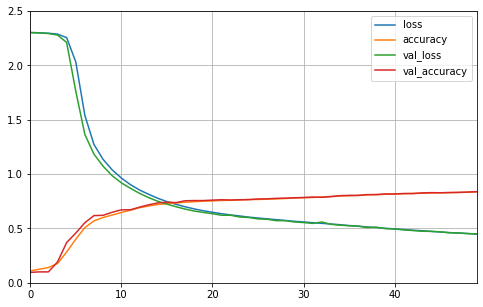

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()
    
plot_learning_curves(history)

## 测试训练好的模型

In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.4720 - accuracy: 0.8222


[0.4720336236000061, 0.82220006]

## 保存模型 


In [11]:
model.save('./save/save_model/model.h5')

In [12]:
model.save_weights('./save/save_weights/model_weights.h5')